#SMS/Email Spam Classifier

Dataset: https://archive.ics.uci.edu/ml/datasets/SMS+Spam+Collection

<br>

**Steps:**
1. Loading Dataset
2. Data Cleaning
3. Exploratory Data Analysis
4. Text Preprocessing
5. Model Building
6. Model Evaluation
7. Model Improvement
8. Deployment 

<br>

## 1. Loading Dataset

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv('orders/spam.csv', encoding='latin-1')
df.sample(5)

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
2989,ham,"Love isn't a decision, it's a feeling. If we c...",NaN,NaN,NaN
3260,ham,Yup i'm still having coffee wif my frens... My...,NaN,NaN,NaN
3192,ham,I will lick up every drop :) are you ready to ...,NaN,NaN,NaN
4440,ham,I'm going 2 orchard now laready me reaching so...,NaN,NaN,NaN
4753,ham,Ok lor... Or u wan me go look 4 u?,NaN,NaN,NaN


In [3]:
df.shape

(5572, 5)

## 2. Data Cleaning

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   v1          5572 non-null   object
 1   v2          5572 non-null   object
 2   Unnamed: 2  50 non-null     object
 3   Unnamed: 3  12 non-null     object
 4   Unnamed: 4  6 non-null      object
dtypes: object(5)
memory usage: 217.8+ KB


In [5]:
# dropping last 3 columns
df.drop(columns=['Unnamed: 2','Unnamed: 3','Unnamed: 4'],inplace=True)
df.sample(5)

,v1,v2
1989,ham,The basket's gettin full so I might be by tonight
1244,ham,Now? I'm going out 4 dinner soon..
1810,ham,"Now, whats your house # again ? And do you hav..."
2862,ham,"Ok that would b lovely, if u r sure. Think abo..."
5435,ham,I'm wif him now buying tix lar...


In [6]:
# renaming the columns
df.rename(columns={'v1':'target','v2':'text'}, inplace=True)
df.sample(5)

,target,text
3300,spam,RCT' THNQ Adrian for U text. Rgds Vatian
3097,ham,This is all just creepy and crazy to me.
1366,ham,Bbq this sat at mine from 6ish. Ur welcome 2 come
4864,ham,I'm really sorry I lit your hair on fire
4692,ham,Tessy..pls do me a favor. Pls convey my birthd...


Mã hóa nhãn mục tiêu thành các giá trị trong khoảng từ 0 đến n-1 với n là số nhãn
Trong ví dụ này ta có 2 loại nhãn là ham và spam:
LabelEncoder sẽ giúp ta đưa những dòng có nhãn là ham về giá trị 0, spam về giá trị 1

In [7]:
from sklearn.preprocessing import LabelEncoder
encoder = LabelEncoder()
df['target'] = encoder.fit_transform(df['target'])
df.head()

,target,text
0,0,"Go until jurong point, crazy.. Available only ..."
1,0,Ok lar... Joking wif u oni...
2,1,Free entry in 2 a wkly comp to win FA Cup fina...
3,0,U dun say so early hor... U c already then say...
4,0,"Nah I don't think he goes to usf, he lives aro..."


In [8]:
# finding missing values
df.isnull().sum()

target    0
text      0
dtype: int64

In [9]:
# checking for duplicate values
df.duplicated().sum()

403

dùng hàm drop duplicate, đặt thuộc tính keep = 'first' để giữ dòng dữ liệu đầu tiên xuất hiện, những cái y hệt sau đó bỏ đi

In [10]:
# removing duplicates
df = df.drop_duplicates(keep='first') 
df.duplicated().sum()

0

In [11]:
df.shape

(5169, 2)

**Data Cleaning Conclusion:**
- Dropped last 3 null colums of the dataset
- Renamed colums
- Mapped target column values to 0 (ham/not-spam) and 1 (spam) using label encoder (Label encoding converts the data in machine-readable form)
- Removed duplicate rows


## 3. Exploratory Data Analysis

In [12]:
df.head()

,target,text
0,0,"Go until jurong point, crazy.. Available only ..."
1,0,Ok lar... Joking wif u oni...
2,1,Free entry in 2 a wkly comp to win FA Cup fina...
3,0,U dun say so early hor... U c already then say...
4,0,"Nah I don't think he goes to usf, he lives aro..."


In [13]:
df['target'].value_counts()

0    4516
1     653
Name: target, dtype: int64

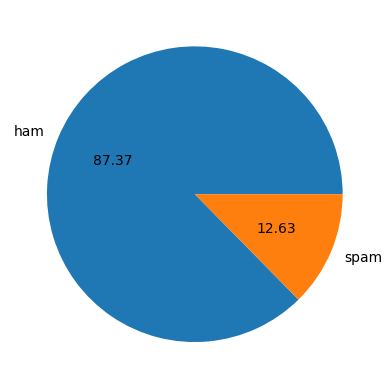

In [14]:
plt.pie(df['target'].value_counts(), labels=['ham','spam'],autopct="%0.2f")
plt.show()

# Conclusion: Data is imbalanced

In [15]:
import nltk
# nltk.download('punkt')

In [16]:
# number of characters in the message
df['num_characters'] = df['text'].apply(len)
df.head()

,target,text,num_characters
0,0,"Go until jurong point, crazy.. Available only ...",111
1,0,Ok lar... Joking wif u oni...,29
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155
3,0,U dun say so early hor... U c already then say...,49
4,0,"Nah I don't think he goes to usf, he lives aro...",61


In [17]:
# number of words in the message
df['num_words'] = df['text'].apply(lambda x:len(nltk.word_tokenize(x)))
df.head()

,target,text,num_characters,num_words
0,0,"Go until jurong point, crazy.. Available only ...",111,24
1,0,Ok lar... Joking wif u oni...,29,8
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37
3,0,U dun say so early hor... U c already then say...,49,13
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15


In [18]:
# number of sentences in the message
df['num_sentences'] = df['text'].apply(lambda x:len(nltk.sent_tokenize(x)))
df.head()

,target,text,num_characters,num_words,num_sentences
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2
1,0,Ok lar... Joking wif u oni...,29,8,2
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2
3,0,U dun say so early hor... U c already then say...,49,13,1
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1


In [19]:
df[['num_characters','num_words','num_sentences']].describe()

,num_characters,num_words,num_sentences
count,5169.000000,5169.000000,5169.000000
mean,78.977945,18.455794,1.965564
std,58.236293,13.324758,1.448541
min,2.000000,1.000000,1.000000
25%,36.000000,9.000000,1.000000
50%,60.000000,15.000000,1.000000
75%,117.000000,26.000000,2.000000
max,910.000000,220.000000,38.000000


In [20]:
# for ham messages
df[df['target'] == 0][['num_characters','num_words','num_sentences']].describe()

,num_characters,num_words,num_sentences
count,4516.000000,4516.000000,4516.000000
mean,70.459256,17.123782,1.820195
std,56.358207,13.493970,1.383657
min,2.000000,1.000000,1.000000
25%,34.000000,8.000000,1.000000
50%,52.000000,13.000000,1.000000
75%,90.000000,22.000000,2.000000
max,910.000000,220.000000,38.000000


In [21]:
# for spam messages
df[df['target'] == 1][['num_characters','num_words','num_sentences']].describe()

,num_characters,num_words,num_sentences
count,653.000000,653.000000,653.000000
mean,137.891271,27.667688,2.970904
std,30.137753,7.008418,1.488425
min,13.000000,2.000000,1.000000
25%,132.000000,25.000000,2.000000
50%,149.000000,29.000000,3.000000
75%,157.000000,32.000000,4.000000
max,224.000000,46.000000,9.000000


<AxesSubplot: xlabel='num_characters', ylabel='Count'>

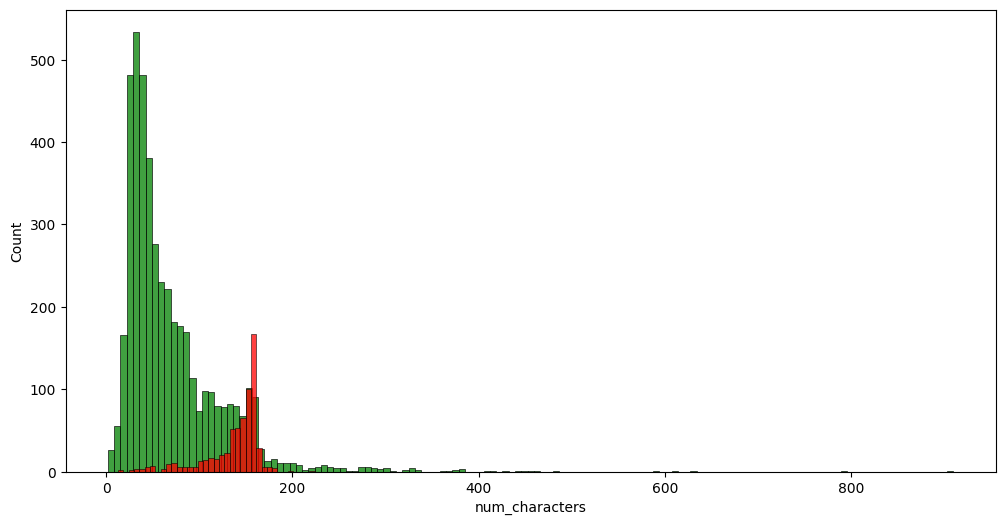

In [22]:
plt.figure(figsize=(12,6))
sns.histplot(df[df['target'] == 0]['num_characters'], color='green')
sns.histplot(df[df['target'] == 1]['num_characters'], color='red')

<AxesSubplot: xlabel='num_words', ylabel='Count'>

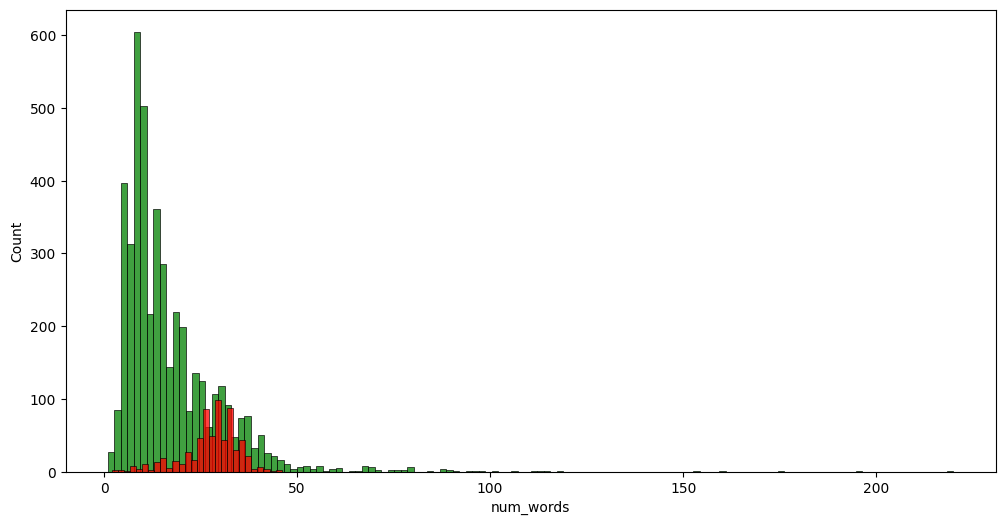

In [23]:
plt.figure(figsize=(12,6))
sns.histplot(df[df['target'] == 0]['num_words'], color='green')
sns.histplot(df[df['target'] == 1]['num_words'],color='red')

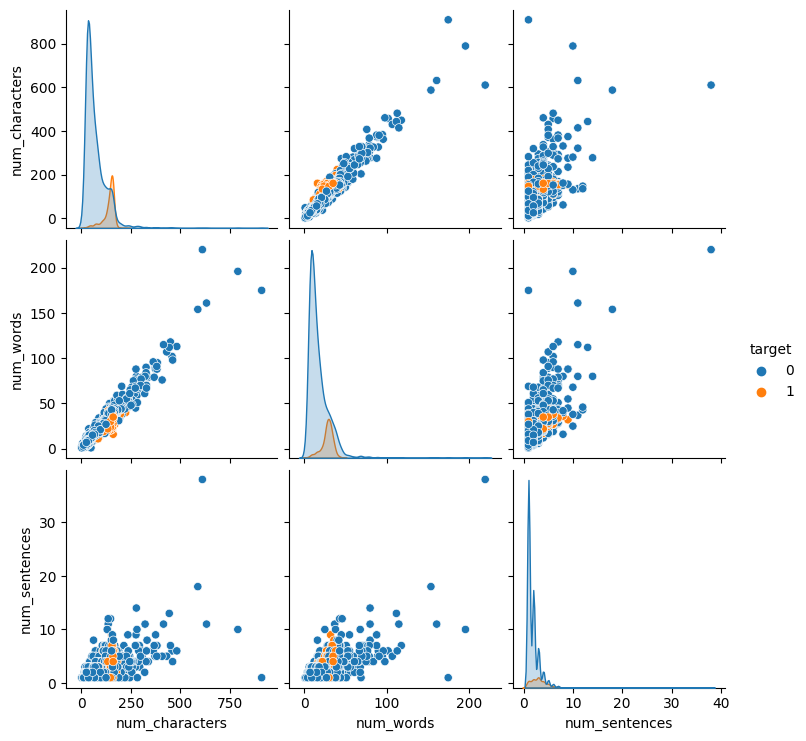

In [24]:
sns.pairplot(df, hue='target')

<AxesSubplot: >

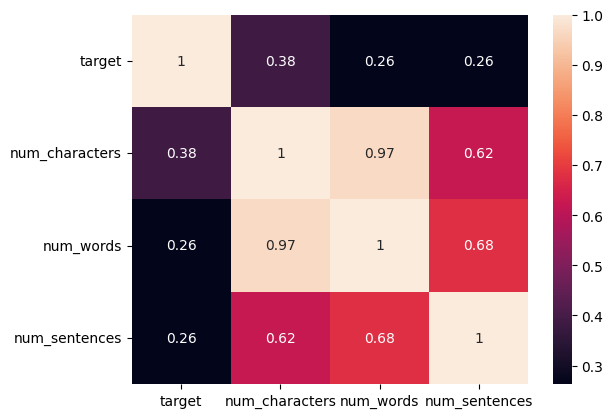

In [25]:
sns.heatmap(df.corr(numeric_only = True), annot=True)

**EDA Conclusion:**
- Given data is imbalanced
- There are more number of characters, words and sentences in spam messages
- Number of sentences is not linearly propotional to number of words
- Outliers are present in the dataset

## 4. Text Preprocessing
- Convert text to lower case
- Tokenization: Split the string, text into a list of tokens 
- Remove special characters
- Remove stop words and punctuation
- Stemming

In [26]:
from nltk.stem.porter import PorterStemmer
ps = PorterStemmer()
print(ps.stem('played'))
print(ps.stem('playing'))

play
play


In [27]:
import string
string.punctuation

'!"#$%&\'()*+,-./:;<=>?@[\\]^_`{|}~'

In [28]:
nltk.download('stopwords')
from nltk.corpus import stopwords
stopwords.words('english')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Lenovo\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


['i',
 'me',
 'my',
 'myself',
 'we',
 'our',
 'ours',
 'ourselves',
 'you',
 "you're",
 "you've",
 "you'll",
 "you'd",
 'your',
 'yours',
 'yourself',
 'yourselves',
 'he',
 'him',
 'his',
 'himself',
 'she',
 "she's",
 'her',
 'hers',
 'herself',
 'it',
 "it's",
 'its',
 'itself',
 'they',
 'them',
 'their',
 'theirs',
 'themselves',
 'what',
 'which',
 'who',
 'whom',
 'this',
 'that',
 "that'll",
 'these',
 'those',
 'am',
 'is',
 'are',
 'was',
 'were',
 'be',
 'been',
 'being',
 'have',
 'has',
 'had',
 'having',
 'do',
 'does',
 'did',
 'doing',
 'a',
 'an',
 'the',
 'and',
 'but',
 'if',
 'or',
 'because',
 'as',
 'until',
 'while',
 'of',
 'at',
 'by',
 'for',
 'with',
 'about',
 'against',
 'between',
 'into',
 'through',
 'during',
 'before',
 'after',
 'above',
 'below',
 'to',
 'from',
 'up',
 'down',
 'in',
 'out',
 'on',
 'off',
 'over',
 'under',
 'again',
 'further',
 'then',
 'once',
 'here',
 'there',
 'when',
 'where',
 'why',
 'how',
 'all',
 'any',
 'both',
 'each

In [29]:
def transform_text(text):
    text = text.lower()
    text = nltk.word_tokenize(text)
    
    y = []
    for i in text:
        if i.isalnum(): #trả về true nếu chuỗi có ít nhất một ký tự và tất cả ký tự là chữ hoặc số. Nếu không hàm sẽ trả về false.
            y.append(i)
    
    text = y[:] #tạo bản sao
    y.clear()
    
    for i in text:
        if i not in stopwords.words('english') and i not in string.punctuation:
            y.append(i)
            
    text = y[:]
    y.clear()
    
    for i in text:
        y.append(ps.stem(i))
    
            
    return " ".join(y)

In [30]:
df['text'][23]

'Aft i finish my lunch then i go str down lor. Ard 3 smth lor. U finish ur lunch already?'

In [31]:
transform_text(df['text'][23])

'aft finish lunch go str lor ard 3 smth lor u finish ur lunch alreadi'

In [32]:
df['transformed_text'] = df['text'].apply(transform_text)
df.head()

,target,text,num_characters,num_words,num_sentences,transformed_text
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2,go jurong point crazi avail bugi n great world...
1,0,Ok lar... Joking wif u oni...,29,8,2,ok lar joke wif u oni
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2,free entri 2 wkli comp win fa cup final tkt 21...
3,0,U dun say so early hor... U c already then say...,49,13,1,u dun say earli hor u c alreadi say
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1,nah think goe usf live around though


In [33]:
from wordcloud import WordCloud
wc = WordCloud(width=500,height=500,min_font_size=10,background_color='white')

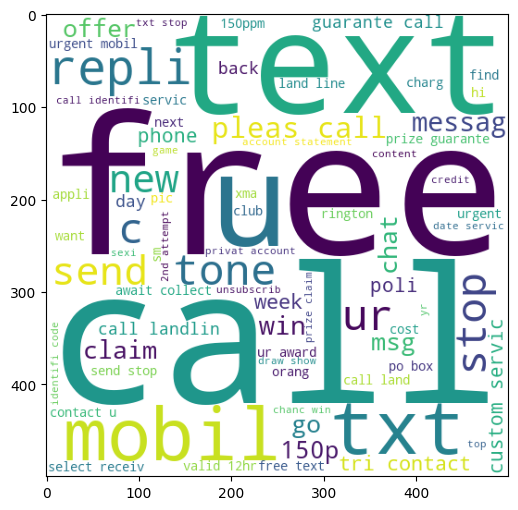

In [34]:
spam_wc = wc.generate(df[df['target'] == 1]['transformed_text'].str.cat(sep=" "))
plt.figure(figsize=(15,6))
plt.imshow(spam_wc)

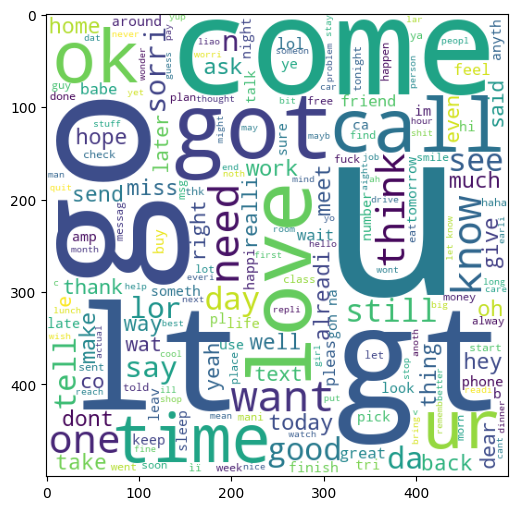

In [35]:
ham_wc = wc.generate(df[df['target'] == 0]['transformed_text'].str.cat(sep=" "))
plt.figure(figsize=(15,6))
plt.imshow(ham_wc)

In [36]:
spam_corpus = []
for msg in df[df['target'] == 1]['transformed_text'].tolist():
    for word in msg.split():
        spam_corpus.append(word)
len(spam_corpus)

9939

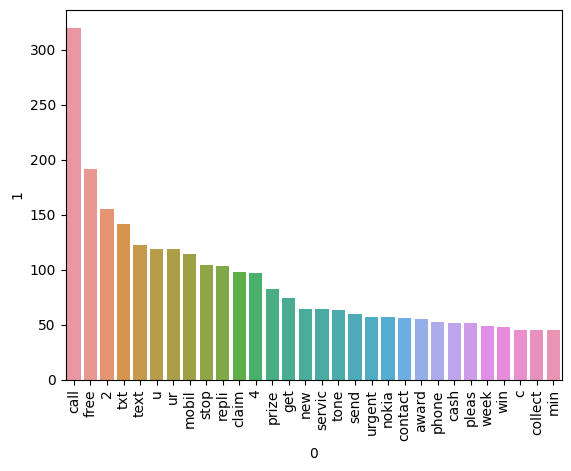

In [37]:
from collections import Counter
from collections import Counter
sns.barplot(x = pd.DataFrame(Counter(spam_corpus).most_common(30))[0], y =pd.DataFrame(Counter(spam_corpus).most_common(30))[1])
plt.xticks(rotation='vertical')
plt.show()

In [38]:
ham_corpus = []
for msg in df[df['target'] == 0]['transformed_text'].tolist():
    for word in msg.split():
        ham_corpus.append(word)
len(ham_corpus)

35404

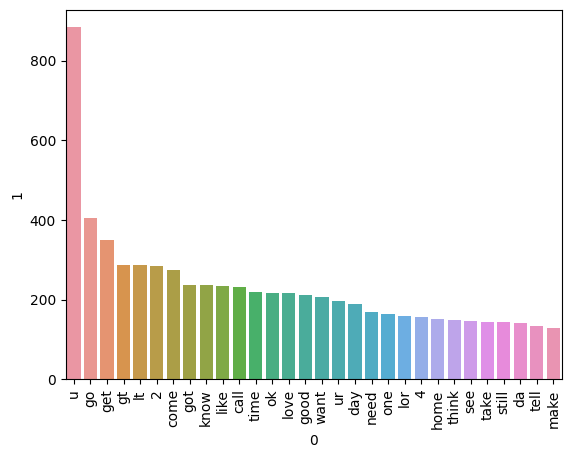

In [39]:
from collections import Counter
sns.barplot(x = pd.DataFrame(Counter(ham_corpus).most_common(30))[0], y = pd.DataFrame(Counter(ham_corpus).most_common(30))[1])
plt.xticks(rotation='vertical')
plt.show()

## 5. Model Building

In [40]:
from sklearn.feature_extraction.text import TfidfVectorizer

tfidf = TfidfVectorizer(max_features=3000) # 3000 is giving good accuracy and precision

X = tfidf.fit_transform(df['transformed_text']).toarray()
X.shape

(5169, 3000)

In [41]:
# # scaling
# from sklearn.preprocessing import MinMaxScaler
# scaler = MinMaxScaler()
# X = scaler.fit_transform(X)

# # appending the num_character feature to X
# X = np.hstack((X,df['num_characters'].values.reshape(-1,1)))

In [42]:
y = df['target'].values

from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=2)

from sklearn.naive_bayes import GaussianNB,MultinomialNB,BernoulliNB
from sklearn.metrics import accuracy_score,confusion_matrix,precision_score,recall_score, f1_score


In [43]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.naive_bayes import MultinomialNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.ensemble import GradientBoostingClassifier
from xgboost import XGBClassifier


svc = SVC(kernel='sigmoid', gamma=1.0)
knc = KNeighborsClassifier()
mnb = MultinomialNB()
dtc = DecisionTreeClassifier(max_depth=5)
lrc = LogisticRegression(solver='liblinear', penalty='l1')
rfc = RandomForestClassifier(n_estimators=50, random_state=2)
abc = AdaBoostClassifier(n_estimators=50, random_state=2)
bc = BaggingClassifier(n_estimators=50, random_state=2)
etc = ExtraTreesClassifier(n_estimators=50, random_state=2)
gbdt = GradientBoostingClassifier(n_estimators=50,random_state=2)
xgb = XGBClassifier(n_estimators=50,random_state=2)


clfs = {
    'SVC' : svc,
    'KN' : knc, 
    'NB': mnb, 
    'DT': dtc, 
    'LR': lrc, 
    'RF': rfc, 
    'AdaBoost': abc, 
    'BgC': bc, 
    'ETC': etc,
    'GBDT':gbdt,
    'xgb':xgb
}

In [44]:
def train_classifier(clf,X_train,y_train,X_test,y_test):
    clf.fit(X_train,y_train)
    y_pred = clf.predict(X_test)
    accuracy = accuracy_score(y_test,y_pred)
    precision = precision_score(y_test,y_pred)
    recall = recall_score(y_test,y_pred)
    f1 = f1_score(y_test,y_pred)

    return accuracy,precision,recall,f1

In [45]:
accuracy_scores = []
precision_scores = []
recall_scores = []
f1_scores = []

for name,clf in clfs.items():
    
    current_accuracy,current_precision, current_recall, current_f1 = train_classifier(clf, X_train,y_train,X_test,y_test)
    
    print("For ",name)
    print("Accuracy - ",current_accuracy)
    print("Precision - ",current_precision)
    print("Recall - ", current_recall)
    print("F1 - ", current_f1)

    accuracy_scores.append(current_accuracy)
    precision_scores.append(current_precision)
    recall_scores.append(current_recall)
    f1_scores.append(current_f1)

For  SVC
Accuracy -  0.9758220502901354
Precision -  0.9747899159663865
Recall -  0.8405797101449275
F1 -  0.9027237354085604
For  KN
Accuracy -  0.9052224371373307
Precision -  1.0
Recall -  0.2898550724637681
F1 -  0.44943820224719105
For  NB
Accuracy -  0.9709864603481625
Precision -  1.0
Recall -  0.782608695652174
F1 -  0.878048780487805
For  DT
Accuracy -  0.9294003868471954
Precision -  0.8282828282828283
Recall -  0.5942028985507246
F1 -  0.6919831223628692
For  LR
Accuracy -  0.9584139264990329
Precision -  0.9702970297029703
Recall -  0.7101449275362319
F1 -  0.8200836820083682
For  RF
Accuracy -  0.9758220502901354
Precision -  0.9829059829059829
Recall -  0.8333333333333334
F1 -  0.9019607843137254
For  AdaBoost
Accuracy -  0.960348162475822
Precision -  0.9292035398230089
Recall -  0.7608695652173914
F1 -  0.8366533864541833
For  BgC
Accuracy -  0.9584139264990329
Precision -  0.8682170542635659
Recall -  0.8115942028985508
F1 -  0.8389513108614233
For  ETC
Accuracy -  0.9

In [46]:
performance_df = pd.DataFrame({'Algorithm':clfs.keys(),'Accuracy':accuracy_scores,'Precision':precision_scores, 'Recall':recall_scores, 'F1':f1_scores}).sort_values('Precision',ascending=False)
performance_df

,Algorithm,Accuracy,Precision,Recall,F1
1,KN,0.905222,1.000000,0.289855,0.449438
2,NB,0.970986,1.000000,0.782609,0.878049
5,RF,0.975822,0.982906,0.833333,0.901961
0,SVC,0.975822,0.974790,0.840580,0.902724
8,ETC,0.974855,0.974576,0.833333,0.898438
4,LR,0.958414,0.970297,0.710145,0.820084
10,xgb,0.967118,0.933333,0.811594,0.868217
6,AdaBoost,0.960348,0.929204,0.760870,0.836653
9,GBDT,0.946809,0.919192,0.659420,0.767932
7,BgC,0.958414,0.868217,0.811594,0.838951


In [47]:
performance_df1 = pd.melt(performance_df, id_vars = "Algorithm")
performance_df1

,Algorithm,variable,value
0,KN,Accuracy,0.905222
1,NB,Accuracy,0.970986
2,RF,Accuracy,0.975822
3,SVC,Accuracy,0.975822
4,ETC,Accuracy,0.974855
5,LR,Accuracy,0.958414
6,xgb,Accuracy,0.967118
7,AdaBoost,Accuracy,0.960348
8,GBDT,Accuracy,0.946809
9,BgC,Accuracy,0.958414


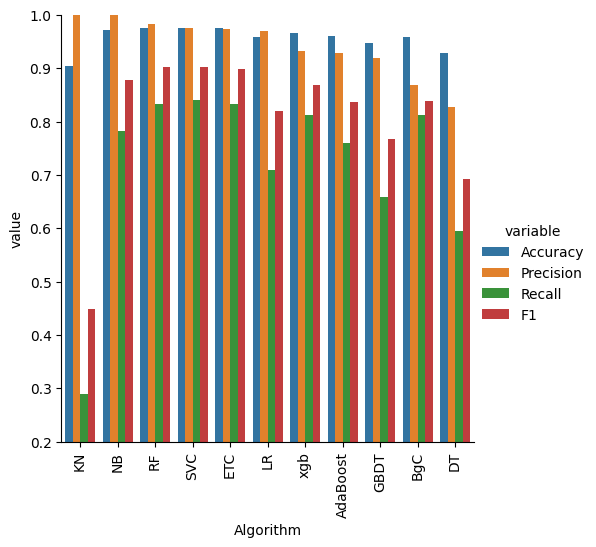

In [96]:
sns.catplot(x = 'Algorithm', y='value', hue = 'variable',data=performance_df1, kind='bar',height=5)
plt.ylim(0.2,1.0)
plt.xticks(rotation='vertical')
plt.show()

In [49]:
import time

def train_classifier_time(clf,X_train,y_train,X_test,y_test):
    start_time = time.time()
    clf.fit(X_train,y_train)
    y_pred = clf.predict(X_test)
    times = time.time()-start_time

    return times

times_times = []

for name,clf in clfs.items():
    current_time = train_classifier_time(clf, X_train,y_train,X_test,y_test)
    print("For ",name)
    print("Time - ", current_time)
    times_times.append(current_time)

For  SVC
Time -  5.175821781158447
For  KN
Time -  0.25083208084106445
For  NB
Time -  0.04250955581665039
For  DT
Time -  0.5417091846466064
For  LR
Time -  0.1023104190826416
For  RF
Time -  4.251290559768677
For  AdaBoost
Time -  9.77663516998291
For  BgC
Time -  58.46485114097595
For  ETC
Time -  17.39224648475647
For  GBDT
Time -  17.890581130981445
For  xgb
Time -  4.307321310043335


In [50]:
performance_df_2 = pd.DataFrame({'Algorithm':clfs.keys(),'Time':times_times}).sort_values('Time',ascending=False)
performance_df_2

,Algorithm,Time
7,BgC,58.464851
9,GBDT,17.890581
8,ETC,17.392246
6,AdaBoost,9.776635
0,SVC,5.175822
10,xgb,4.307321
5,RF,4.251291
3,DT,0.541709
1,KN,0.250832
4,LR,0.102310


In [51]:
performance_df3 = pd.melt(performance_df_2, id_vars = "Algorithm")
performance_df3

,Algorithm,variable,value
0,BgC,Time,58.464851
1,GBDT,Time,17.890581
2,ETC,Time,17.392246
3,AdaBoost,Time,9.776635
4,SVC,Time,5.175822
5,xgb,Time,4.307321
6,RF,Time,4.251291
7,DT,Time,0.541709
8,KN,Time,0.250832
9,LR,Time,0.102310


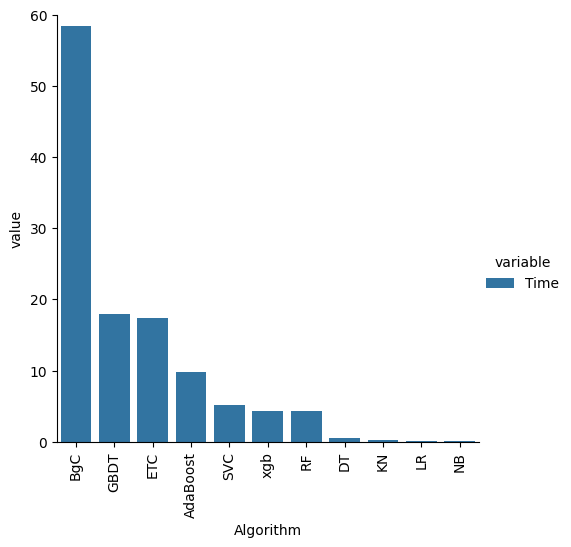

In [59]:
sns.catplot(x = 'Algorithm', y='value', hue = 'variable',data=performance_df3, kind='bar',height=5)
plt.ylim(0,60)
plt.xticks(rotation='vertical')
plt.show()

In [77]:
clfs = {
    'KN' : knc, 
    'NB': mnb, 
    'DT': dtc, 
    'LR': lrc, 
}

In [78]:
import time

def train_classifier_time(clf,X_train,y_train,X_test,y_test):
    start_time = time.time()
    clf.fit(X_train,y_train)
    y_pred = clf.predict(X_test)
    times = time.time()-start_time

    return times

times_times = []

for name,clf in clfs.items():
    current_time = train_classifier_time(clf, X_train,y_train,X_test,y_test)
    print("For ",name)
    print("Time - ", current_time)
    times_times.append(current_time)

For  KN
Time -  0.2146749496459961
For  NB
Time -  0.041184186935424805
For  DT
Time -  0.5478754043579102
For  LR
Time -  0.06212043762207031


In [79]:
performance_df_5 = pd.DataFrame({'Algorithm':clfs.keys(),'Time':times_times}).sort_values('Time',ascending=False)
performance_df_5

,Algorithm,Time
2,DT,0.547875
0,KN,0.214675
3,LR,0.062120
1,NB,0.041184


In [80]:
performance_df6 = pd.melt(performance_df_5, id_vars = "Algorithm")
performance_df6

,Algorithm,variable,value
0,DT,Time,0.547875
1,KN,Time,0.214675
2,LR,Time,0.062120
3,NB,Time,0.041184


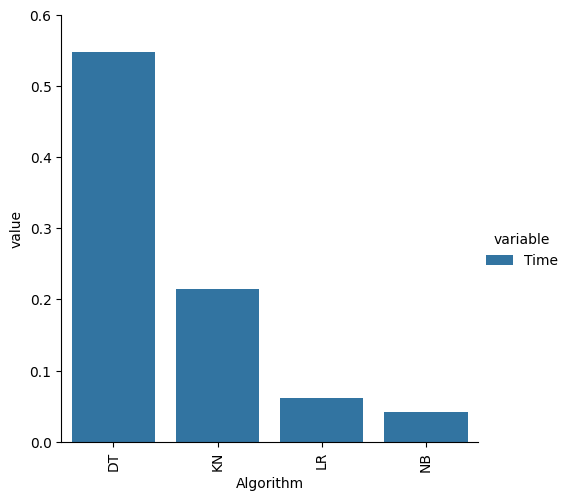

In [81]:
sns.catplot(x = 'Algorithm', y='value', hue = 'variable',data=performance_df6, kind='bar',height=5)
plt.ylim(0,0.6) # xet cho DT KN LR NB
plt.xticks(rotation='vertical')
plt.show()

Execution time: --- 0.037512779235839844 seconds ---
Accuracy 0.9709864603481625
Precision 1.0
Recall 0.782608695652174
F1 0.878048780487805


<AxesSubplot: >

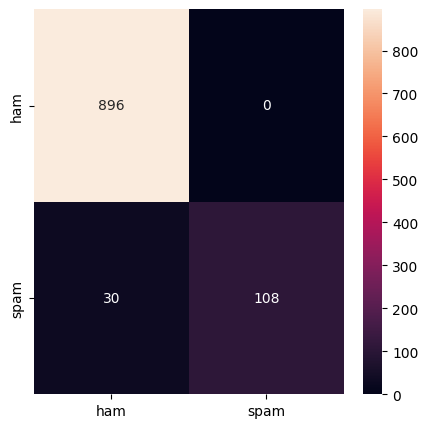

In [53]:
#Multinomial Naive Bayes
import time
start_time = time.time()
mnb = MultinomialNB()
mnb.fit(X_train,y_train)
y_pred = mnb.predict(X_test)
print("Execution time:", "--- %s seconds ---" % (time.time() - start_time) )
print("Accuracy",accuracy_score(y_test,y_pred))
print("Precision",precision_score(y_test,y_pred))
print("Recall", recall_score(y_test,y_pred))
print("F1", f1_score(y_test, y_pred))
class_labels = ['ham', 'spam']
plt.figure(figsize = (5,5))
cm = confusion_matrix(y_test,y_pred)
sns.heatmap(cm , annot = True,fmt = 'd',xticklabels = class_labels,yticklabels = class_labels)

Execution time: --- 42.743969202041626 seconds ---
Accuracy 0.9816247582205029
Precision 0.9917355371900827
Recall 0.8695652173913043
F1 0.9266409266409266


<AxesSubplot: >

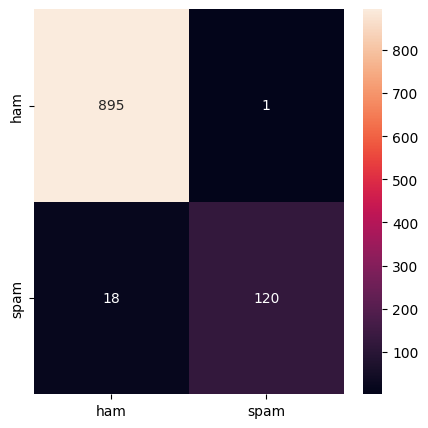

In [54]:
# Voting Classifier
import time
start_time = time.time()
svc = SVC(kernel='sigmoid', gamma=1.0,probability=True)
mnb = MultinomialNB()
etc = ExtraTreesClassifier(n_estimators=50, random_state=2)

from sklearn.ensemble import VotingClassifier

voting = VotingClassifier(estimators=[('svm', svc), ('nb', mnb), ('et', etc)],voting='soft')
voting.fit(X_train,y_train)
y_pred = voting.predict(X_test)

print("Execution time:", "--- %s seconds ---" % (time.time() - start_time) )
print("Accuracy",accuracy_score(y_test,y_pred))
print("Precision",precision_score(y_test,y_pred))
print("Recall", recall_score(y_test,y_pred))
print("F1", f1_score(y_test, y_pred))
class_labels = ['ham', 'spam']
plt.figure(figsize = (5,5))
cm = confusion_matrix(y_test,y_pred)
sns.heatmap(cm , annot = True,fmt = 'd',xticklabels = class_labels,yticklabels = class_labels)